In [ ]:
Paper:
    1. Harmonic Compatibility
    2. Rythmic Compatibility
    3. Spectral Balance
    
Section II we provide a system-level overview of the under-lying music analysis techniques 
for beat tracking, downbeat estimation and phrase segmentation. 
In Section III we ad-dress the measurement of mashability. 
In Section IV we demonstrate the user interface and several usage scenarios for AutoMashUpper. 
In Section V we present both objective and subjective evaluation of our mashup system. 
The paper concludes with discussion in Section VI and conclusions in Section VII


Use NNLS to extract global tuning, tuned semitone spectrogram, 12 dimensional chromagram


Now I have the downbeat, maybe I should extract the chords and perform pitch shifting and see how it works.

In [1]:
import librosa, librosa.display, numpy
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from pprint import pprint

In [9]:
#load files
file_name = 'just_a_dream.wav'
data, sr = librosa.load(file_name)

/home/dukeng/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


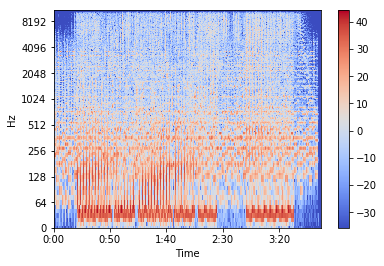

In [10]:
X = librosa.stft(data)
Xmag = librosa.amplitude_to_db(X)
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
# H, P = librosa.decompose.hpss(data)


In [11]:
H, P = librosa.decompose.hpss(X)
Hmag = librosa.amplitude_to_db(H)
Pmag = librosa.amplitude_to_db(P)


/home/dukeng/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


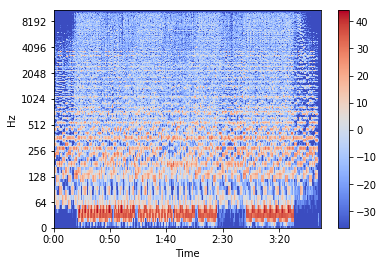

In [13]:
librosa.display.specshow(Hmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


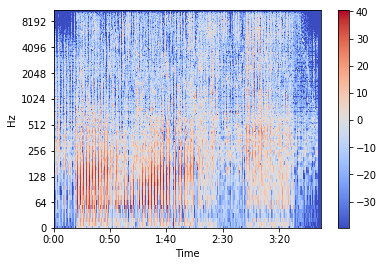

In [12]:
librosa.display.specshow(Pmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [14]:
h = librosa.istft(H)
ipd.Audio(h, rate=sr)
out_filename = "just_a_dream" +"_h.wav"
librosa.output.write_wav(out_filename, h, sr)

In [15]:
p = librosa.istft(P)
ipd.Audio(p, rate=sr)
out_filename = "just_a_dream" +"_p.wav"
librosa.output.write_wav(out_filename, p, sr)